<a href="https://colab.research.google.com/github/Biswa2710/Biswa2710/blob/main/mlpbl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (Run this cell first. In Colab TF already hota hai; install only if needed)
# !pip install -q tensorflow numpy matplotlib scikit-learn seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import itertools

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32')  / 255.0
X_train = X_train[..., np.newaxis]   # shape -> (n,28,28,1)
X_test  = X_test[..., np.newaxis]

print("Train shape:", X_train.shape, "Train labels:", y_train.shape)
print("Test shape :", X_test.shape,  "Test labels :", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28, 1) Train labels: (60000,)
Test shape : (10000, 28, 28, 1) Test labels : (10000,)


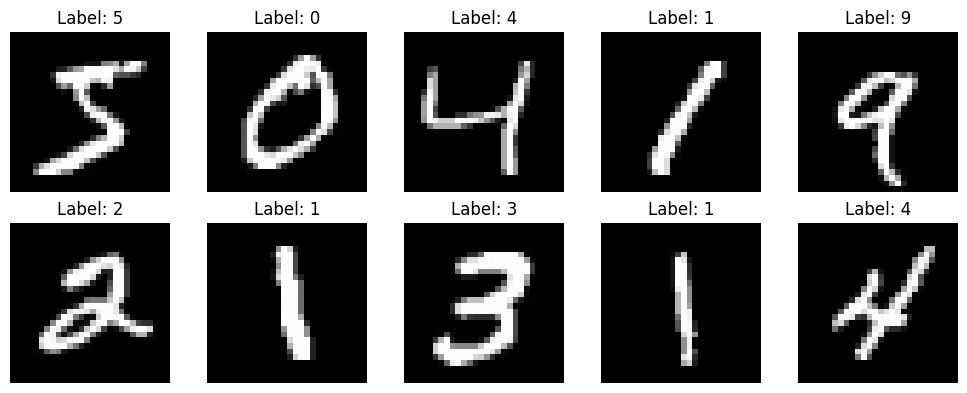

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_mnist_cnn.h5', monitor='val_accuracy', save_best_only=True)
print("Callbacks ready.")


Callbacks ready.


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[es, mc])


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9821 - loss: 0.0654 - val_accuracy: 0.9897 - val_loss: 0.0401
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 76s 90ms/step - accuracy: 0.9899 - loss: 0.0338 - val_accuracy: 0.9907 - val_loss: 0.0424
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9892 - val_loss: 0.0505
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9946 - loss: 0.0182 - val_accuracy: 0.9907 - val_loss: 0.0438
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9936 - loss: 0.0218

844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.9936 - loss: 0.0218 - val_accuracy: 0.9930 - val_loss: 0.0343
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9923 - val_loss: 0.0390
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 75s 89ms/step - accuracy: 0.9952 - loss: 0.0158 - val_accuracy: 0.9927 - val_loss: 0.0440
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9954 - loss: 0.0134

844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.9954 - loss: 0.0134 - val_accuracy: 0.9932 - val_loss: 0.0353
Epoch 9/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9961 - loss: 0.0113 - val_accuracy: 0.9905 - val_loss: 0.0399
Epoch 10/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 76s 91ms/step - accuracy: 0.9968 - loss: 0.0104 - val_accuracy: 0.9897 - val_loss: 0.0538


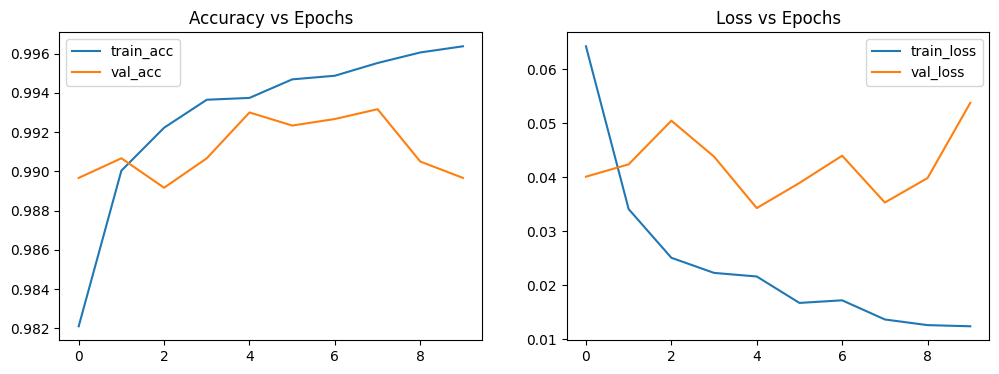

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy vs Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss vs Epochs')
plt.show()


Test accuracy: 99.07%  |  Test loss: 0.0328
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


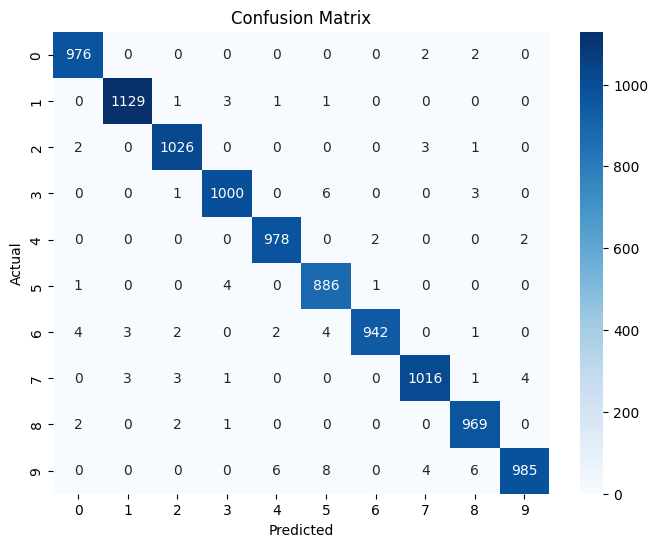

              precision    recall  f1-score   support

           0     0.9909    0.9959    0.9934       980
           1     0.9947    0.9947    0.9947      1135
           2     0.9913    0.9942    0.9927      1032
           3     0.9911    0.9901    0.9906      1010
           4     0.9909    0.9959    0.9934       982
           5     0.9790    0.9933    0.9861       892
           6     0.9968    0.9833    0.9900       958
           7     0.9912    0.9883    0.9898      1028
           8     0.9858    0.9949    0.9903       974
           9     0.9939    0.9762    0.9850      1009

    accuracy                         0.9907     10000
   macro avg     0.9906    0.9907    0.9906     10000
weighted avg     0.9907    0.9907    0.9907     10000



In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc*100:.2f}%  |  Test loss: {test_loss:.4f}")

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, digits=4))


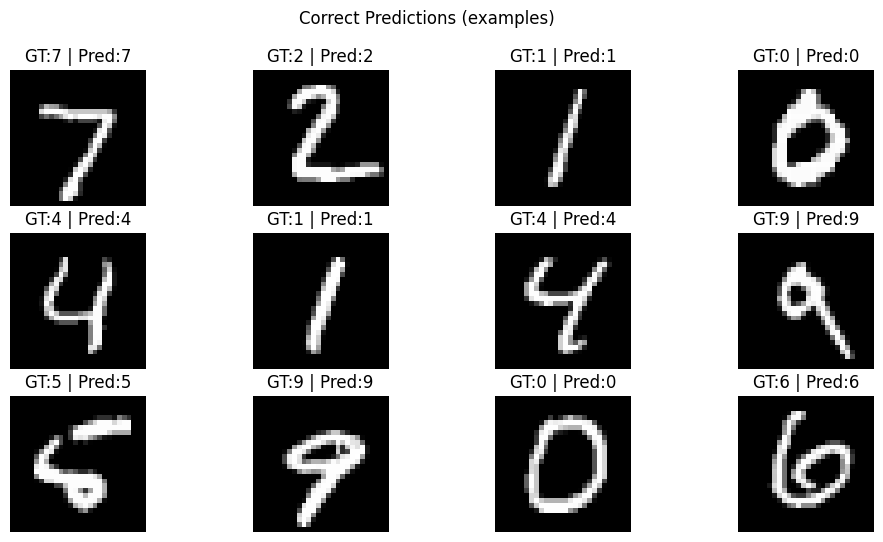

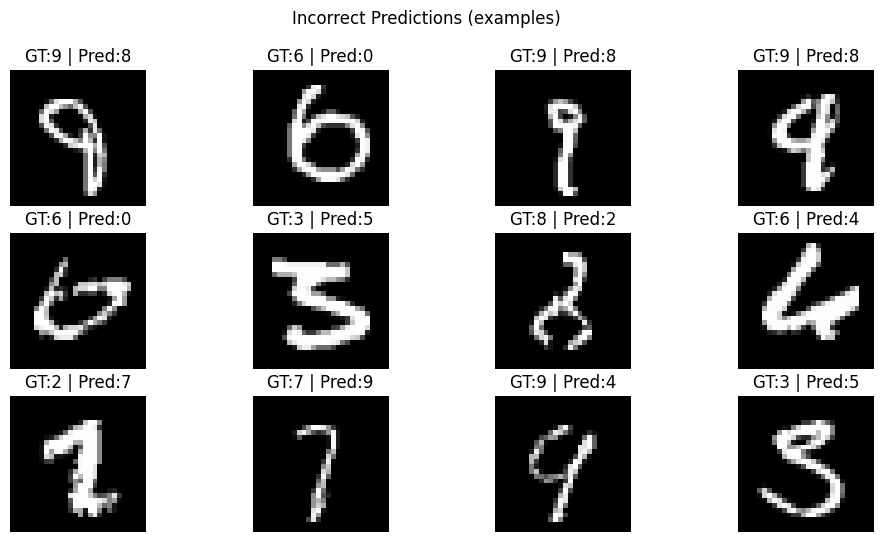

In [ ]:
wrong_idx = np.where(y_pred != y_test)[0]
right_idx = np.where(y_pred == y_test)[0]

def show_samples(indices, title, n=12):
    plt.figure(figsize=(12,6))
    for i, idx in enumerate(indices[:n]):
        plt.subplot(3,4,i+1)
        plt.imshow(X_test[idx].squeeze(), cmap='gray')
        plt.title(f"GT:{y_test[idx]} | Pred:{y_pred[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(right_idx, "Correct Predictions (examples)")
show_samples(wrong_idx, "Incorrect Predictions (examples)")


In [ ]:
# Save final model
model.save('mnist_cnn_final.h5')
print("Model saved as mnist_cnn_final.h5")

# Example single prediction (using test image idx 0)
idx = 0
img = X_test[idx]  # shape (28,28,1)
pred_prob = model.predict(img.reshape(1,28,28,1))
pred_label = np.argmax(pred_prob)
print("Ground truth:", y_test[idx], "| Predicted:", pred_label, "| Prob:", np.max(pred_prob))

# Function to predict external 28x28 grayscale numpy array
def predict_image(img_array_28x28):
    x = img_array_28x28.astype('float32')/255.0
    if x.ndim==2:
        x = x.reshape(1,28,28,1)
    pred = model.predict(x)
    return np.argmax(pred), np.max(pred)


Model saved as mnist_cnn_final.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Ground truth: 7 | Predicted: 7 | Prob: 1.0
